# Project: 2021 Tokyo Olympics 

The dataset contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams who took part in the 2021(2020) Tokyo Olympics. This dataset also contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the files
athlete_data=pd.read_excel('Athletes.xlsx')
coach_data = pd.read_excel("Coaches.xlsx")
gender_data = pd.read_excel("EntriesGender.xlsx")
medal_data = pd.read_excel("Medals.xlsx")
team_data = pd.read_excel("Teams.xlsx")

C:\Users\HP\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Let's look at the first few rows for each table

In [3]:
athlete_data.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [4]:
coach_data.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [5]:
gender_data.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [6]:
medal_data.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [7]:
team_data.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


### I've listed 10 questions I'm going to get answers to


1. Which countries do most athletes come from? 


2. Which country has the most female athletes? 


3. Which country has the least female athlete


4. Which sport is most popular (based on athletes counts)  and which country has the highest participants in it? 


5. Show gender segregated athlete counts in different sports  with a descendingly ordered categorical bar plot.


6. Which sport has they highest proportion of male to female athletes? 


7. Which country recieved most gold medals? Which recieved most silver and most bronze? Which received least for each? 


8. Which country has the highest number of medals (Gold – Silver- Bronze) per capita (participants)?


9. Which countries didn't win any medals?


10. Identify the most popular coach, female and male athlete first name? Just for fun

### 1: Which countries do most athletes come from? I'll plot a descendingly ordered bar plot to show athletes counts based on their country of origin to illustrate this

In [8]:
#Check for missing values at a glance with discrepancies in the columns
athlete_data.isnull().any()

# No null values.I'll interpret 'most' to be the top 10 countries based on number of athletes

MostAthlete = (athlete_data['NOC']  #Select the countries
                   .value_counts() #Select the top 10 countries
              )
MostAthlete.head(10) #Top 10 Countries

United States of America      615
Japan                         586
Australia                     470
People's Republic of China    401
Germany                       400
France                        377
Canada                        368
Great Britain                 366
Italy                         356
Spain                         324
Name: NOC, dtype: int64

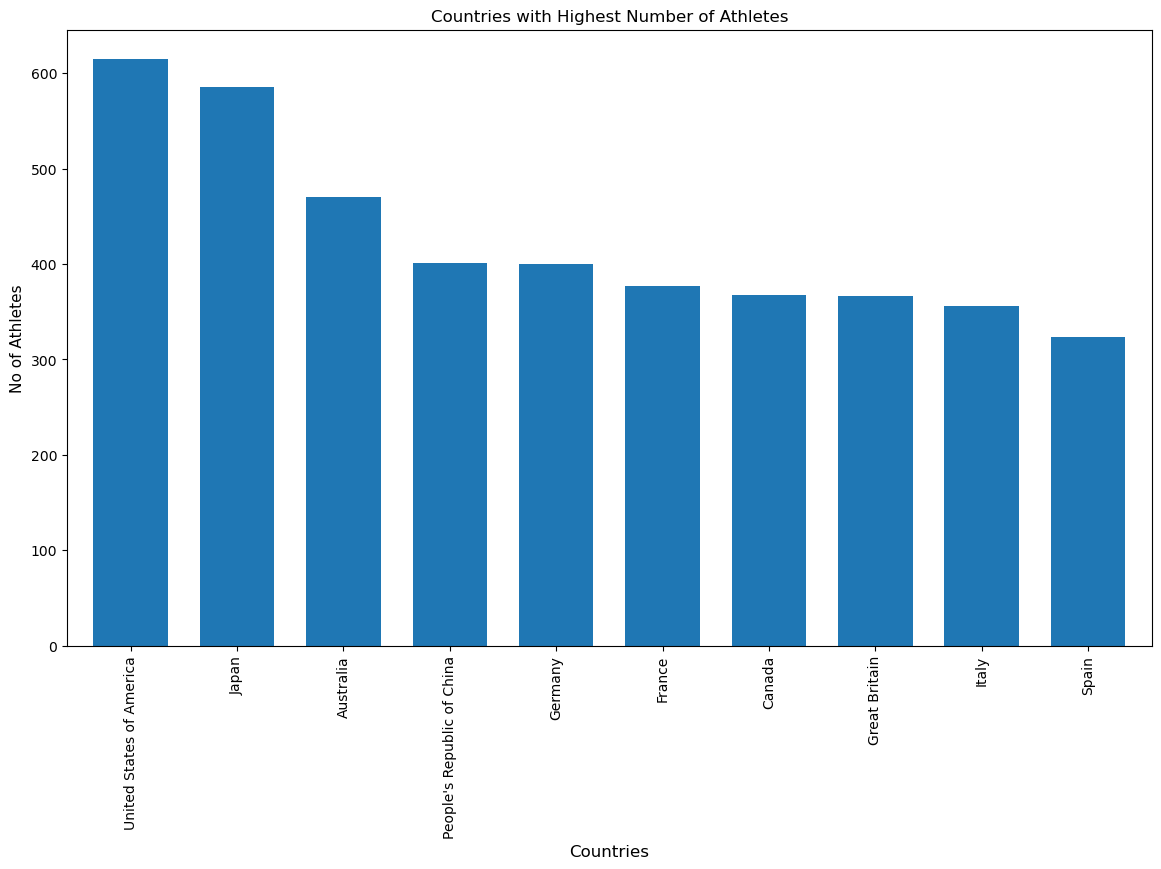

In [9]:
MostAthlete[0:10].plot.bar(width=0.7, figsize=(14,8)) #I
plt.xlabel('Countries',fontsize=12)
plt.ylabel('No of Athletes',fontsize=11)
plt.xticks(size =10)
plt.title('Countries with Highest Number of Athletes');

### 2. Which country has the most female athletes? Plot a descendingly ordered bar plot to show female athletes counts based on their country of origin?

In [10]:
'''
The task is to find a way to estimate the number of female athletes per country.
Observations:
1. len(team_data.Discipline.value.counts()) revealed that 20 sport events were 
   represented in the team_data dataframe
2. len(athlete_data['Discipline'].value_counts()) revealed that the athletes
   partcipated in 46 sport events
3. This was corroborated by len(gender_data['Discipline'].value_counts()) which
   also revealed that the two genders participated in 46 sport events.
   
The following block of code will show a dataframe containing the 26 disciplines(or sports) not represented in the team dataframe:

ath_disc= athlete_data.Discipline.value_counts().reset_index().rename(columns={'index': 'Sports In Athlete Data'})
team_disc =team_data.Discipline.value_counts().reset_index().rename(columns={'index': 'Sports In Team Data'})
sports_compare =pd.merge(ath_disc.iloc[:,0], team_disc.iloc[:,0], left_on ='Sports In Athlete Data', right_on='Sports In Team Data', how='outer')
discipline_not_in_team_data =sports_compare.loc[sports_compare['Sports In Team Data'].isnull(), 'Sports In Athlete Data'].reset_index(drop=True)
discipline_not_in_team_data
   
Inferences:
1. The team data seemingly represents team sport events and the data in it cannot
   be used to estimate the female athlete ratio since it doesn't include solo sports
2. The two dataframes to be used are therefore athlete_data and gender data

'''


women_gender=(gender_data
                  #Create a Female to Male Ratio column based on the information in the gender data
                  .assign(Female_Ratio =lambda df: df.Female.div(df.Total))
              
                  #2Filter out irrelevant columns
                  .loc[:,['Discipline','Female','Female_Ratio']]
             )

#Get the number of athletes for each sports by country in the athlete_data dataframe
participant= (athlete_data
                  .groupby(['NOC','Discipline'], as_index=False).count()
                  .rename(columns={'Name': 'Number_of_Participants'})
             )

#Merge the two dataframes
female_data=(pd.merge(participant, women_gender, how='outer')
                 .sort_values(by='Number_of_Participants', ascending=False) #Sort the data
                 .drop('Female', axis=1) #Drop the superfluous column
                 #Extract the number of female participant for each sport for each country based on the ratio of female to male participants
                 .assign(Female_Participants=lambda df: (df.Female_Ratio.mul(df.Number_of_Participants)).map(int)) #convert the float numbers to the nearest integers
                 .set_index('Discipline') #Change the index to the Discipline column for easier manipulation
            )

#Group the data to find the total estimated number of female participants per country
grouped_female =(female_data
                     .groupby('NOC',as_index=False)['Female_Participants']
                     .sum()
                     .sort_values(by='Female_Participants', ascending=False)                  
                )


grouped_female= (grouped_female
                     #Filter out the countries with estimated female participants of zero (0)
                     .loc[grouped_female['Female_Participants'] >0]
                     #Set the country as index for easir plot
                     .set_index('NOC')
                )

grouped_female.iloc[[0]] #The first record

,Female_Participants
NOC,
United States of America,277


#### I'll then plot a graph to show the top 10 countries with the highest number of female participants

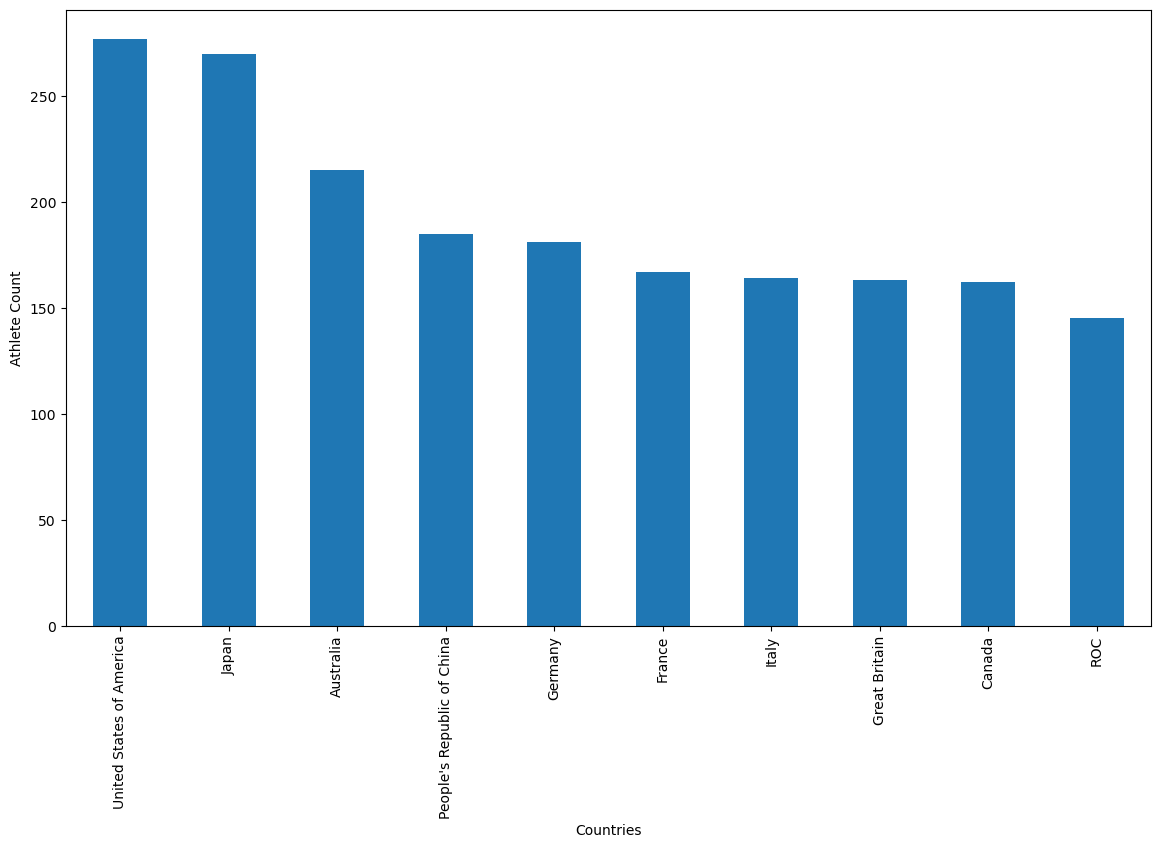

In [11]:
grouped_female[:10].plot(kind='bar',figsize=(14,8),grid=False, legend=False, ylabel='Athlete Count', xlabel='Countries');

### 3. Which country has the least female athletes?

In [12]:
#easy peazy
grouped_female.iloc[[-1]]  #The last record

,Female_Participants
NOC,
Luxembourg,1


### 4. Which sport is most popular (based on athletes counts)  and which country has the highest participants in it? I'll then plot a descendingly ordered bar plot to show athlete counts in different sports? 

In [13]:
countrySport = (athlete_data
                    .groupby(['Discipline','NOC'] )['Name'].count()
                    .to_frame()
                    .sort_values(by='Name', ascending=False)
                    .rename(columns={'Name': 'Number of Participants'})  
                 )
countrySport.iloc[[0]] #The topmost record


,,Number of Participants
Discipline,NOC,
Athletics,United States of America,144


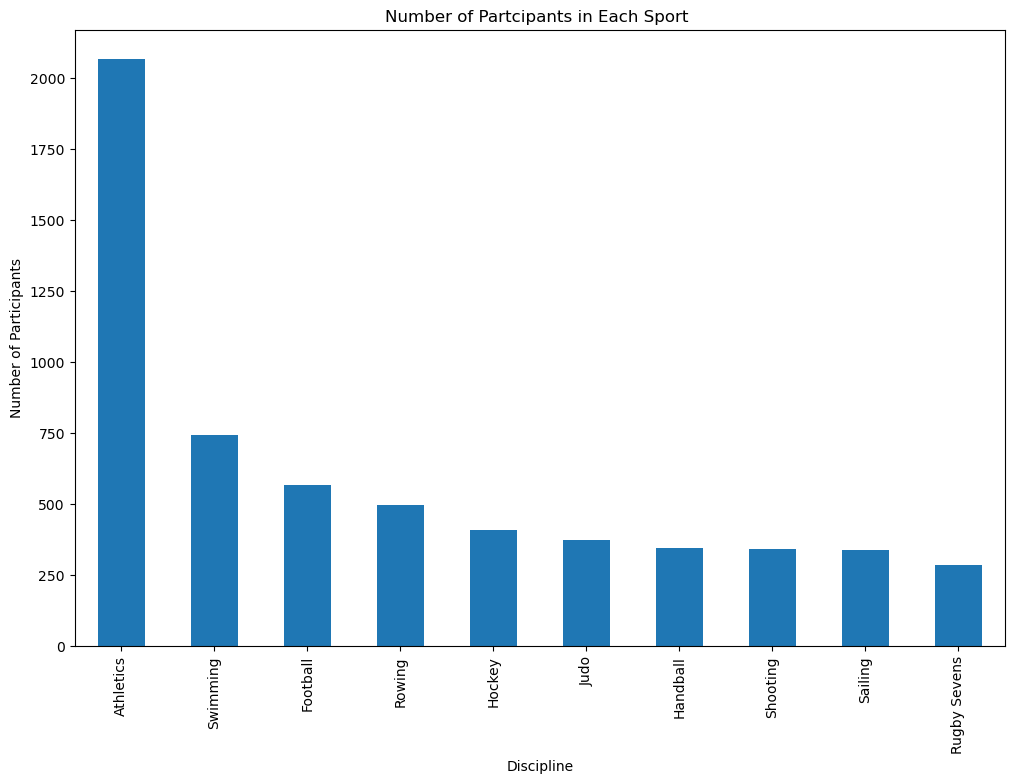

In [14]:
athlete_countplot= (athlete_data
                        .groupby('Discipline')['Name'].count()
                        .sort_values(ascending=False)[:10] #Top 10 Sports with Highest Number of Participants
                        .plot(kind='bar', figsize=(12,8), ylabel='Number of Participants', title='Number of Partcipants in Each Sport ')
                   )

### 5. Show gender segregated athlete counts in different sports  with a descendingly ordered categorical bar plot

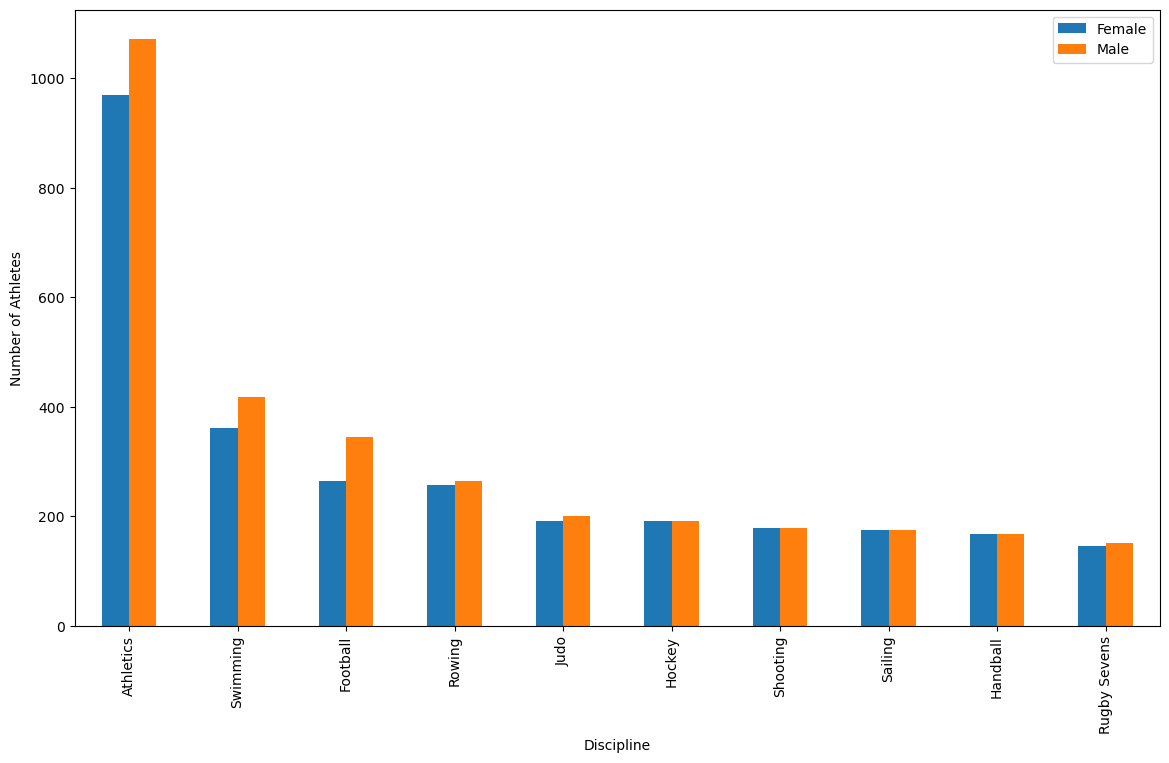

In [15]:
gender_seg=(gender_data
                .sort_values(by='Total', ascending=False)
                .set_index('Discipline')[:10] #The first 10 sports
                .drop('Total', axis=1)
                .plot.bar(figsize=(14,8), ylabel='Number of Athletes')
           )

### 6. Which sport has they highest proportion of male to female athletes?

In [16]:
male_prop= (gender_data
            #Create a percentage columns for both genders based on their ratios
            .assign(Male_Percentage=lambda df: round((df.Male.div(df.Total))*100, 2))
            .assign(Female_Percentage=lambda df: round((df.Female.div(df.Total))*100, 2))
            .drop(['Female','Male', 'Total'], axis=1)
            .set_index('Discipline')
            .sort_values(by='Male_Percentage', ascending=False)         
           )

male_prop.iloc[[0]]

,Male_Percentage,Female_Percentage
Discipline,,
Wrestling,66.78,33.22


In [17]:
#### I should probably show the top 10 sports with more male athletes than female

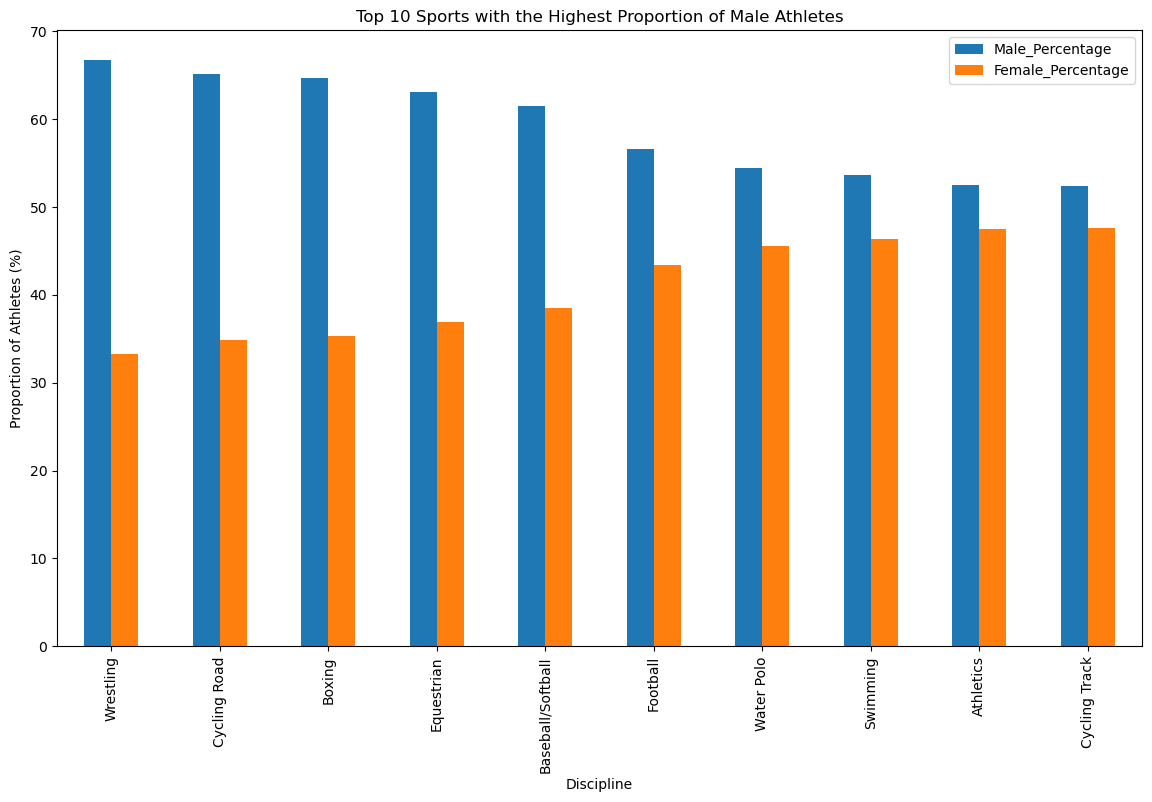

In [18]:
male_prop[:10].plot(kind='bar',figsize=(14,8), ylabel='Proportion of Athletes (%)') #Top 10 sports with higher male athletes count
plt.title('Top 10 Sports with the Highest Proportion of Male Athletes');

### 7. Which country recieved most gold medals? Which recieved most silver and most bronze? Which received least for each? 

In [19]:
#Assumption: That we're concerned with teams that won at least ONE medal in EACH of the medal categories since some countries didn't win at al
medal_sort =(medal_data
                 .sort_values(by=['Gold','Silver','Bronze'], ascending=False)
                 .loc[(medal_data.Gold>0) & (medal_data.Silver>0) & (medal_data.Bronze>0)] #locate teams that won at least one medal each
                 .set_index('Team/NOC')
                 .drop(['Rank','Total', 'Rank by Total'], axis=1)
            )
medal_sort.style.background_gradient(cmap='PuBuGn')
#USA had the most medals in all categories
#Ethiopia and Portugal had the least medals

,Gold,Silver,Bronze
Team/NOC,,,
United States of America,39,41,33
People's Republic of China,38,32,18
Japan,27,14,17
Great Britain,22,21,22
ROC,20,28,23
Australia,17,7,22
Netherlands,10,12,14
France,10,12,11
Germany,10,11,16


#### A barplot perhaps?

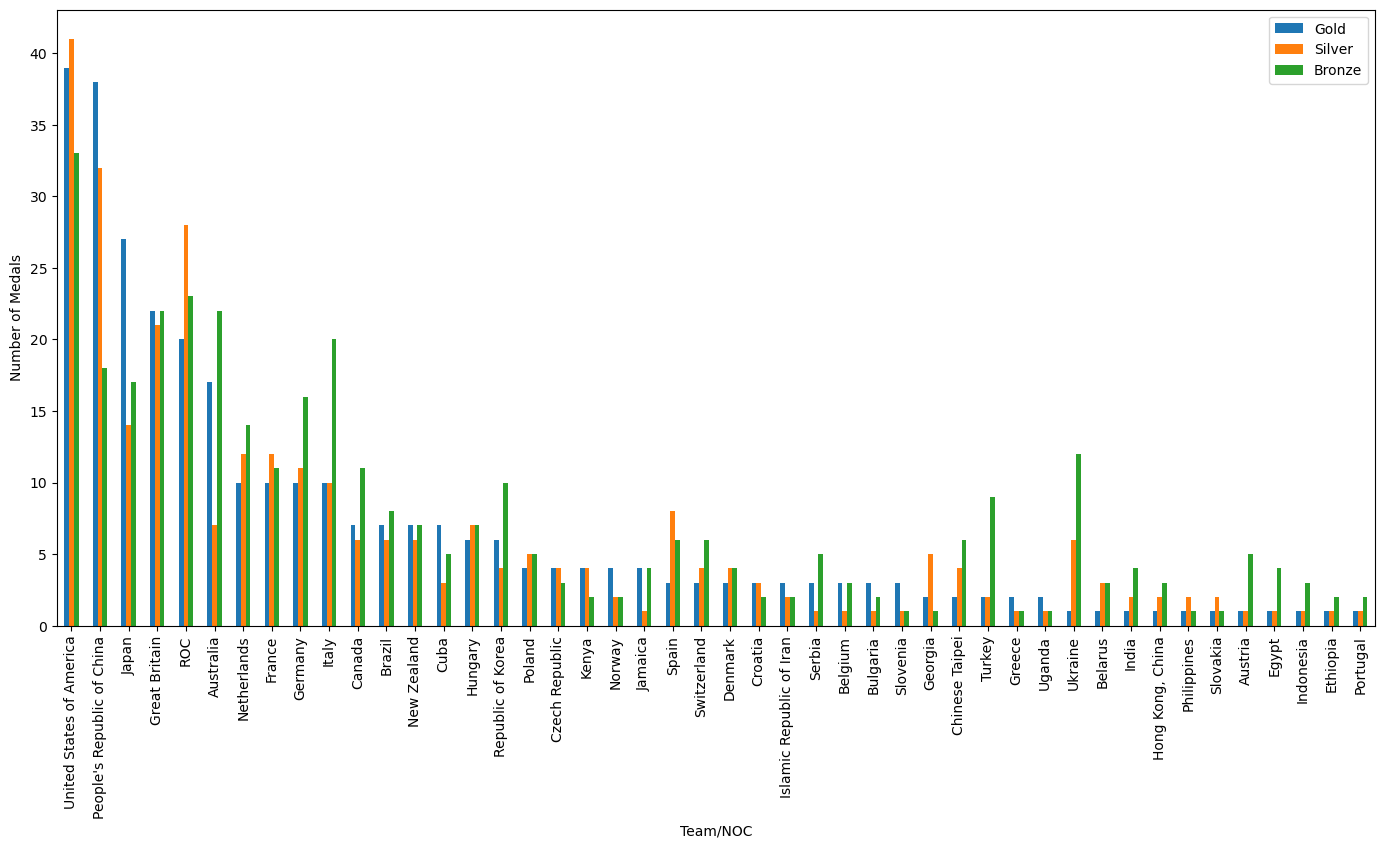

In [20]:
medal_sort.plot(kind='bar', figsize=(17,8), ylabel='Number of Medals');

### 8. Which country has the highest number of medals (Gold – Silver- Bronze) per capita (participants)? 

In [21]:
#1: Get the total number of partipants per country
athlete_sport= (athlete_data['NOC']
                .value_counts()
                .reset_index()
                .rename(columns={'index': 'NOC', 'NOC': 'Number_of_Athletes'}) #easier readability
               )
#2: Merge the dataframe above with the medal dataframe
merged_medal=(pd.merge(medal_data,athlete_sport, left_on='Team/NOC',right_on='NOC', how='left')# left join to prevent nan values
                  #Drop one of the Team identifier columns and other irrelevant columns    
                  .drop(['NOC','Rank', 'Rank by Total'], axis =1) 
                  #Create a column(series) on the dataframe that calculates the ratio of medals to participants
                  .assign(Per_Capital_Medal=lambda df: df.Total.div(df.Number_of_Athletes))
                  #Sort the new dataframe
                  .sort_values(by='Per_Capital_Medal', ascending=False)
                  #Reset the index for better readability
                  .reset_index(drop=True)
                  #8: Select the first record in the dataframe
                  .loc[[0]]
             )
merged_medal   #San Marino's 4 athletes won 3 medals. Not bad!      

,Team/NOC,Gold,Silver,Bronze,Total,Number_of_Athletes,Per_Capital_Medal
0,San Marino,0,1,2,3,4,0.75


### 9: Which countries didn't win any medals?

In [22]:
# Get the list of countries that presented athletes
countries= (athlete_data['NOC']
                .value_counts() #This reveals that there are 206 participating countries
                .reset_index()
                .rename(columns={'index': 'Participating_Countries'}) #easier readability
                .drop('NOC',axis=1)
               )
#medal_data['Team/NOC'].value_counts() reveals that 93 countries won medals
#That means (206-93): 113 countries didn't win any medals
#Let's dig in!

# Write a function that fills in yes or no to show if a country won any medal
def YesNo(medal):
    if medal in [None, np.nan, 'NaN']:
        return 'No'
    else:
        return 'Yes'
    
#Merge it with the medal data
country_merged=(pd.merge(countries, medal_data,  right_on='Team/NOC', left_on='Participating_Countries', how='outer')
                    # Drop unneccsary columns    
                    .drop(['Rank', 'Gold','Silver','Bronze', 'Rank by Total'], axis=1)
                    # Rename columns
                    .rename(columns={'Team/NOC':'Country_Won_Medal', 'Total':'Total_Medals_Won'})
                    .assign(Total_Medals_Won =lambda df:df.Total_Medals_Won.fillna(0).map(int)) #fill null value and convert to integers
                    .assign(Country_Won_Medal =lambda df: df.Country_Won_Medal.apply(YesNo))
               )
    

    

#Locate the countries that did not win any medal
NoMedals =(country_merged
               .loc[country_merged['Country_Won_Medal']== 'No']
               .reset_index(drop=True)
          )
NoMedals
#NoMedals.shape[0] confirms that 113 countries didn't win any medal

,Participating_Countries,Country_Won_Medal,Total_Medals_Won
0,Chile,No,0
1,Algeria,No,0
2,Montenegro,No,0
3,Peru,No,0
4,Trinidad and Tobago,No,0
...,...,...,...
108,United Republic of Tanzania,No,0
109,Saint Kitts and Nevis,No,0
110,Marshall Islands,No,0
111,Vanuatu,No,0


## 10. Identify the most popular coach, female and male athlete first name?

In [23]:
'''Assumption: That I should get the most popular first name in both
the coach_data DataFrame and the athlete_data DataFrame instead of the
most popular first name in each
'''

#1: Strip all columns in the athlete_data dataframe except the name column
stripped_athlete=athlete_data.drop(['NOC','Discipline'], axis=1)

#2: Do the same for the coach_data dataframe
stripped_coach=coach_data.drop(['NOC','Discipline','Event'], axis=1)

#3: Concatenate the two dataframes
names_concat =(pd.concat([stripped_athlete,stripped_coach], axis=0, ignore_index=True)
               .reset_index(drop=True)
              )
              

#4: Check for errors
     #athlete_data.shape[0] shows that there are 11,085 records
     #coach_data.shape[0] shows that there are 394 records
names_concat.shape[0] #shows that there are 11,479 rows so we're good

#5: Create a first name column with the values extracted from the Name column
     #It seems the first name is written last.Such confusion :(
names_concat['First Name'] =names_concat['Name'].apply(lambda x: x.split(' ')[-1])

#6: Get the frequency of first names and select the topmost
(names_concat['First Name']
         .value_counts()
         .iloc[[0]]
)

Anna    57
Name: First Name, dtype: int64